# 4-卷积神经网络-CNN
参考：海口数据培训课程

In [ ]:
既然我们已经有了神经网络，而且还很深，而且还有各种技巧：优化、初值、过拟合
是不是所有的问题都可以解决了？

那么考虑**图像**的场景：（比如分类问题，如之前一直看到的，为mnist分类）

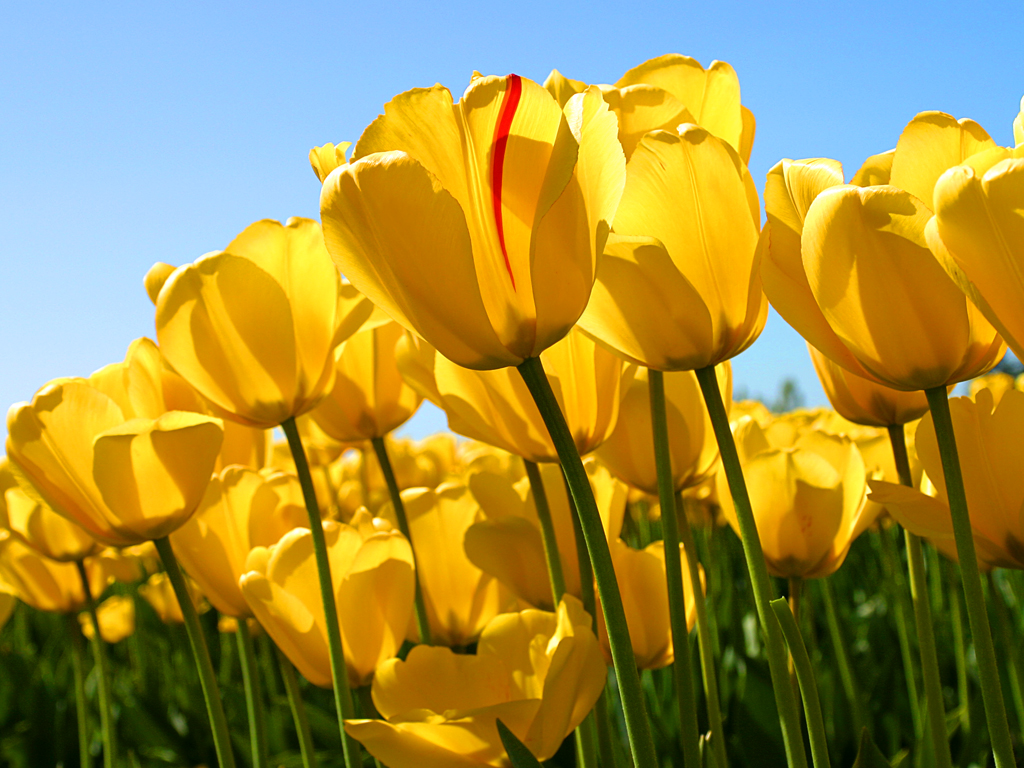

In [1]:
from IPython.display import Image
Image(filename='pic_dir/Tulips.jpg', width=250)

我们传统的动机是：

- 像mnist一样，将图片拉平，放入神经网络（全连接层）


但是这会出现很大的问题：

1. 参数太多（参数爆炸）
2. 损失了局域信息（对于图片来说，局域信息很重要）

<hr>

回忆我们做传统机器学习的过程：

- 特征工程+模型调参  = 很好的效果

- 刚才在神经网络中，比如用于mnist的方式中，有不有设计特征工程的问题？貌似没有

In [ ]:
传统的做法？

In [ ]:
对了，还是特征工程+机器学习模型

In [ ]:
看看图像上的特征工程

In [ ]:
有很多算法可以做图片特征提取：SIFT,HoG等等

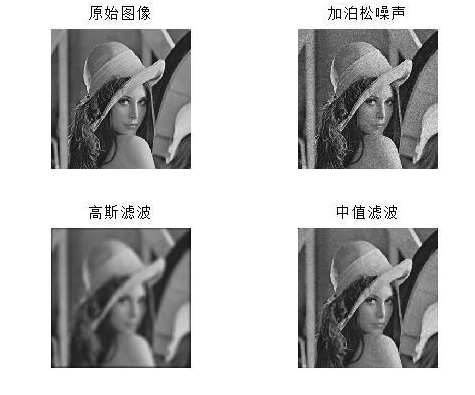

In [2]:
from IPython.display import Image
Image(filename='pic_dir/lb1.png', width=350)

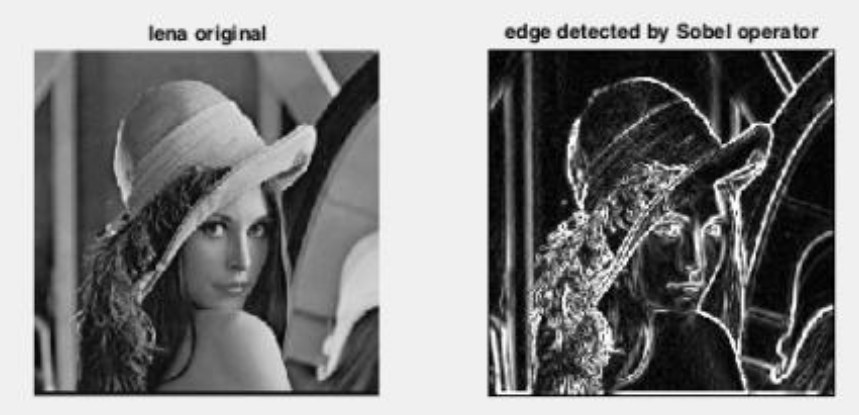

In [3]:
from IPython.display import Image
Image(filename='pic_dir/lb2.png', width=250)

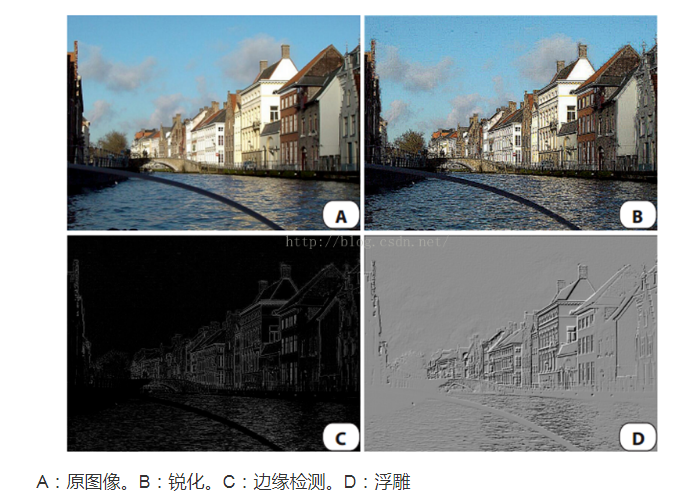

In [4]:
from IPython.display import Image
Image(filename='pic_dir/lb3.png', width=350)

In [ ]:
所以即使不做计算机图像，我们也能知道一点：滤波器是用来做特征提取的

In [ ]:
和卷积的关系？

In [ ]:
很多滤波的效果就是通过卷积实现的

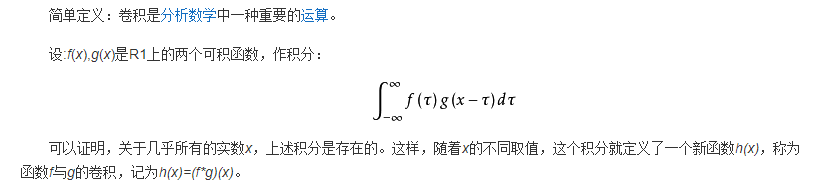

In [5]:
from IPython.display import Image
Image(filename='pic_dir/conv.png', width=550)

以上比较数学

其实在图像处理中，卷积是一种常用的线性滤波的方法。可以理解为求两个矩阵的滑动点积或者滑动內积

![](./pic_dir/convolution_schematic.gif)

![](./pic_dir/giphy.gif)

一个概念：

卷积核：表示一个权值矩阵，表示如何处理单个像素与其领域像素的关系

回到刚才的滤波的图像，我们可以看到，
1. 一个卷积核，可能有能力提取图片的一类特征（比如，边缘，锐化等等）
2. 目前看到的卷积核，是我们自己设计定义的（根据经验）

问题：
有不有可能，通过机器学习的方式，去学出卷积核？那么边学特征，边进行分类，整个流程就形成

客观事实：
1. 卷积是利用卷积核提取的是一类特征
2. 是“简单（乘法加法）”计算

得到解决：
1. 局域信息（感受野）
2. 参数爆炸

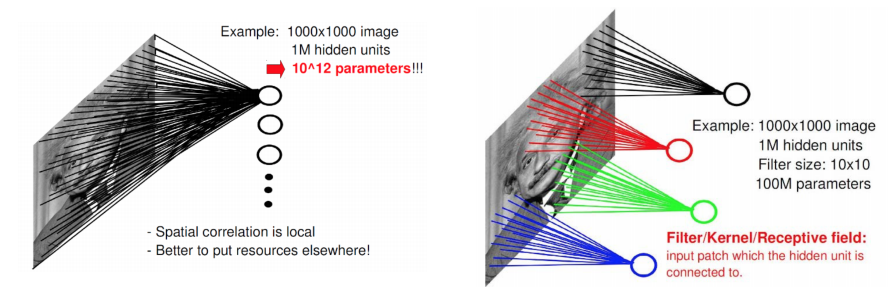

In [6]:
from IPython.display import Image
Image(filename='pic_dir/p.png', width=450)

借助以上的思路，我们得到了卷积神经网络从网络结构而言的优点：

1. 局部感受野（提取局域信息）
2. 权值共享（参数爆炸）
3. 多核卷积（特征提取）

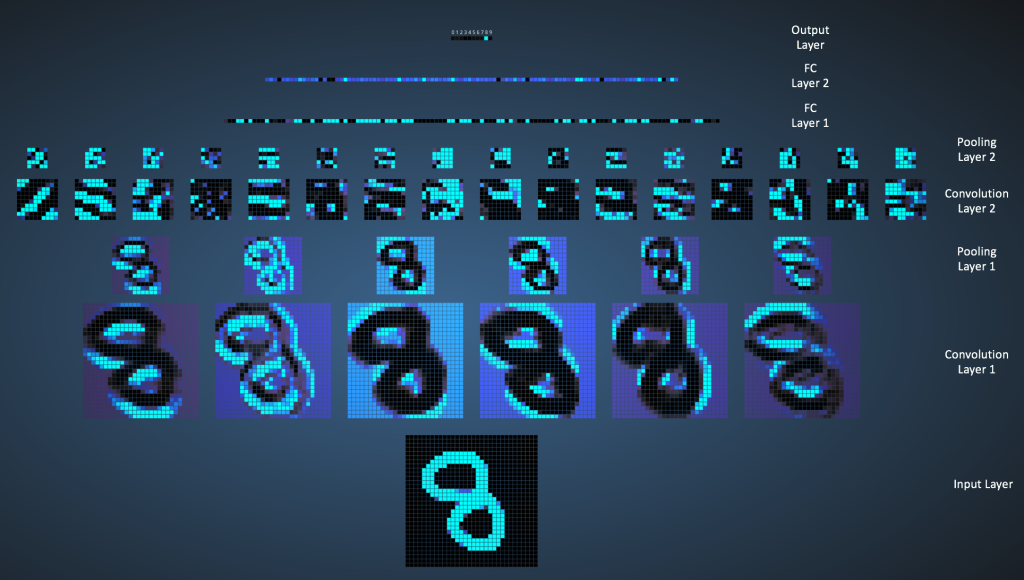

In [7]:
Image(filename='pic_dir/conv_all.png', width=550)

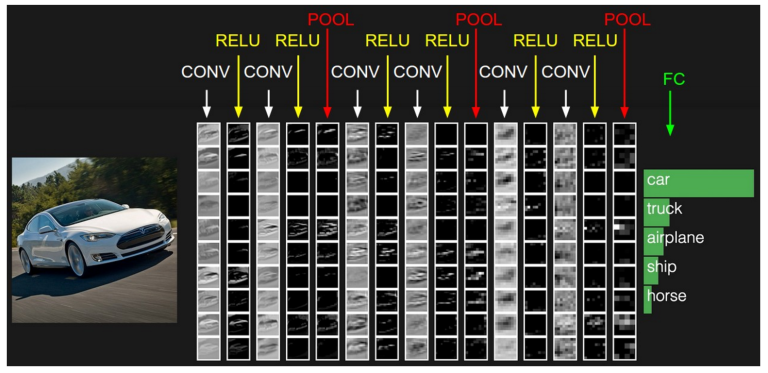

In [8]:
Image(filename='pic_dir/car.png', width=550)

#### 卷积神经网络的结构-基本概念

### 卷积层

In [ ]:
1. 卷积操作
2. 卷积核
3. 多核卷积

In [ ]:
1. 卷积操作&卷积核

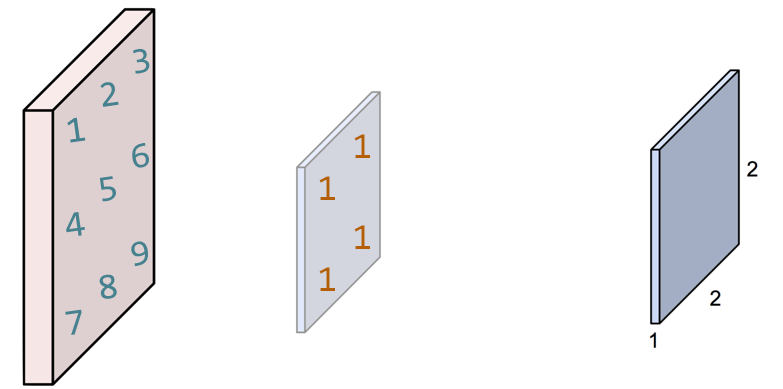

In [9]:
Image(filename='pic_dir/conop.png', width=450)

In [ ]:
关于维度、通道的概念：
图像：28*28*3
卷积核：3*3*3

In [ ]:
3. 多核卷积

通过多个卷积核，产生多个“新”图片（feature map）

In [ ]:
卷积核详解：

1. 是矩阵（或者张量），结构由用户定义（3*3）
2. 卷积核是神经网络的参数，就像w，b一样
3. 设定初值，通过反向传播进行计算（tf帮你做掉）
4. 卷积核的选择：
    4.1 大小
    4.2 步长
    4.3 厚度
    4.4 奇数偶数
    4.5 增补padding

多核卷积详解：

1. 56个卷积核，则新的图片有56张，那么下一级的输入就有56个通道（多好还是少好？）
2. 每个卷积核刷出来的图片，叫做feature map，其实是代表描述一类图片特征的特征图
3. 注意卷积操作之后，各个维度的关系（因为我们要设计inference的结构）

1. 局部感受野（提取局域信息）- 通过多个卷积核达到
2. 权值共享（参数爆炸）--  参数对比： 5x5x通道数x卷积核数  vs. 全连接128x128x128x128
3. 多核卷积（特征提取）--  可以很多卷积核（不同的features map，不同作用）

In [15]:
#tf实现：
#tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, name=None)
# name：用以指定操作的name
# use_cudnn_on_gpu:bool类型，是否使用cudnn加速，默认为true

import tensorflow as tf
# input:256*256*channel=3
# shape = [batch, image_height, image_weidth, inmage_channel]
x = tf.placeholder(tf.float32, shape=[None, 256, 256, 3])
# conv layer
conv = tf.nn.conv2d(x, filter=[3,3,3,32],
                   strides = [1,2,2,1],
                   padding = 'SAME')
# filter:[3*3， 输入3通道，输出32通道（卷积核32个）]
# strides:二维图片：strides取[1，stride，stride，1]
# padding: 只能是"SAME","VALID"其中之一

### 池化层

在做卷积的过程中，其实是在提升维度（多个卷积核）
通过池化层进行降维（注意，每个feature map都需要做pooling）

那么什么是池化呢？--降采样

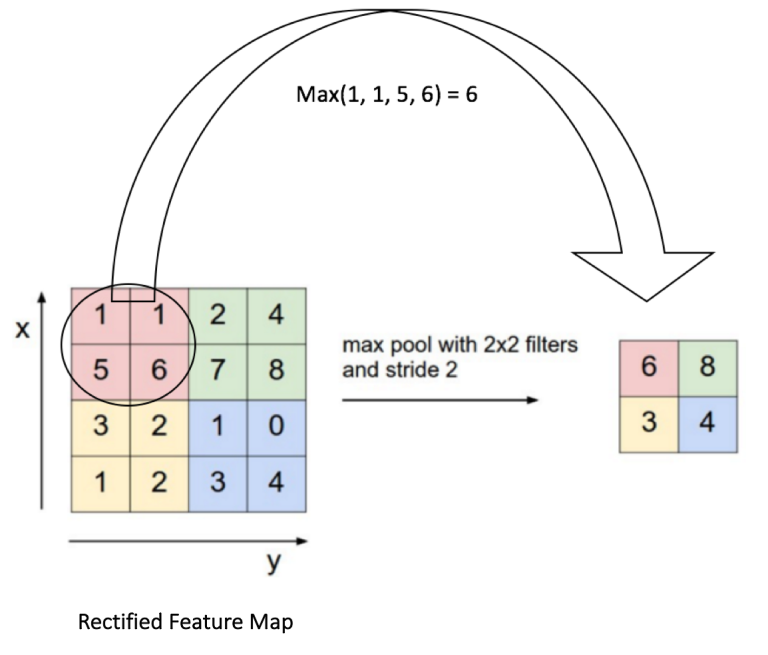

In [10]:
Image(filename='pic_dir/pooling.png', width=350)

In [ ]:
1. 最大池化
2. 平均池化

In [12]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


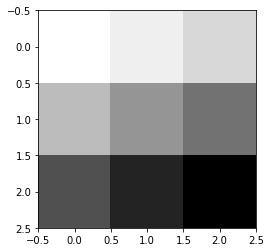

In [13]:
# 造一个灰色的图片
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


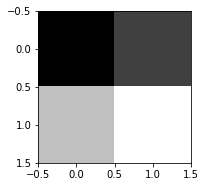

In [15]:
## 1 filter (2,2,1,1) with padding: VALID
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


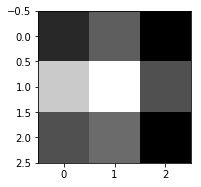

In [19]:
## 1 filter (2,2,1,1) with padding:SAME

print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


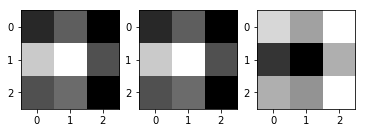

In [20]:
## 3 filters (2,2,1,3)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [21]:
## MAX POOLING

image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


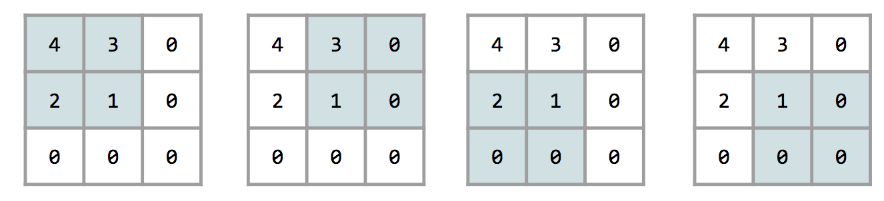

In [14]:
## SAME: Zero paddings
from IPython.display import Image
Image(filename='pic_dir/pd.png', width=350)

In [15]:
## SAME: Zero paddings
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


<hr>

In [25]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


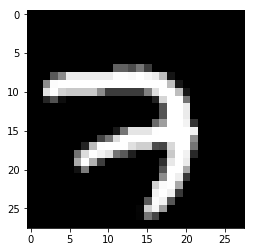

In [26]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


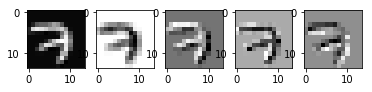

In [27]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
# 走一层卷积操作
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


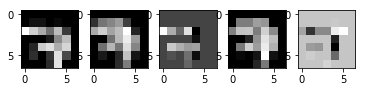

In [28]:
# 再走一层最大池化
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

### 激活函数层

In [ ]:
比如relu

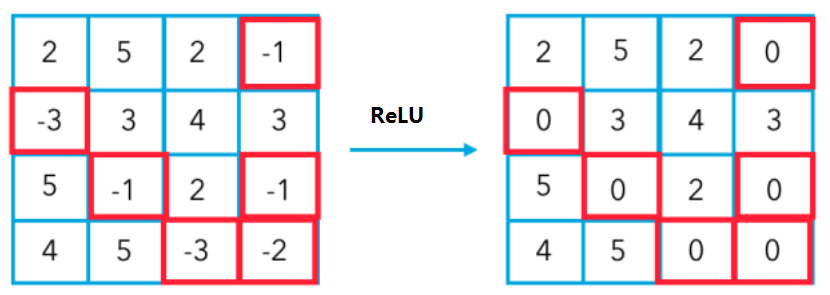

In [16]:
Image(filename='pic_dir/relub.png', width=450)

In [ ]:
增加非线性表达

In [ ]:
AlexNet:同一个网络结构，ReLU比tanh快6倍以上

### 批归一化层

批量归一化（batch normalization）：

原因：

因为在训练的时候，前面层**训练参数的更新**将导致后面层**输入数据分布**的变化。以网络第二层为例：网络的第二层输入，是由第一层的参数和输入计算得到的。而第一层的参数在整个训练过程中一直在变化，因此必然会引起后面每一层输入数据分布的改变。我们把网络中间层在训练过程中，数据分布的改变称之为：“Internal  Covariate Shift”。

做法：

如果在每一层输入的时候，再加个预处理操作。比如网络第三层输入数据把它归一化至：均值0、方差为1，然后再输入第三层计算，这样我们就可以解决前面所提到的“Internal Covariate Shift”的问题

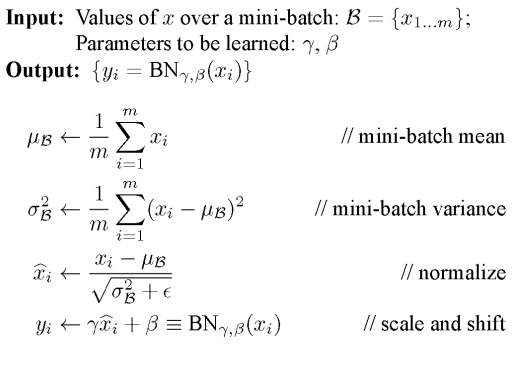

In [17]:
Image(filename='pic_dir/bn.png', width=350)

In [ ]:
m = K.mean(X, axis=-1, keepdims=True)#计算均值  
std = K.std(X, axis=-1, keepdims=True)#计算标准差  
X_normed = (X - m) / (std + self.epsilon)#归一化  
out = self.gamma * X_normed + self.beta#重构变换  

好处：

- 减少梯度消失，加快收敛速度。
- 允许更大的学习率
- 不需要dropout
- 减少L2正则
- 减少图像增强

### 局部归一化层-LRN层

In [ ]:
local response normalization

In [ ]:
不同点：
BN需要根据mini batch数据，BN有参数需要学习

效果：

在AlexNet中使用，LRN模仿神经系统的“侧抑制”机制，对局部神经元的活动创建竞争环境，使得其中响应比较大的值变得相对更大，并抑制其它反馈较小的神经元，增强模型的泛化能力。（减小过拟合）

对ReLU比较有用：

激活---池化---LRN

### 切分融合层


- network in network
- google inception net
- inception module

### 番外：数据增强

### 设计两个CNN

CNN1：两个卷积+一个全连接+一个输出层

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
sess = tf.InteractiveSession()


def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  
                        
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(x, [-1,28,28,1])
                        
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.global_variables_initializer().run()
for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.14
step 100, training accuracy 0.88
step 200, training accuracy 0.82
step 300, training accuracy 0.92
step 400, training accuracy 0.86
step 500, training accuracy 0.96
step 600, training accuracy 1
step 700, training accuracy 0.92
step 800, training accuracy 0.96
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
step 1100, training accuracy 0.98
step 1200, training accuracy 1
step 1300, training accuracy 0.9
step 1400, training accuracy 0.92
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 0.96
step 1800, training accuracy 0.94
step 1900, training accuracy 0.98
test accuracy 0.975


### CIFAR-10的案例

- CIFAR-10数据集包含60000张32x32的彩色图片
- 包含10个类，每类6000张
- 50000张训练+10000张测试

http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
极好资料：
https://github.com/tensorflow/models
/models/tutorials/image/cifar10/cifar10_train.py

- cifar10_data放着数据，在cifar10.py里定义
- cifar10.py inference Build the CIFAR-10 model
- distorted_inputs数据增强

In [ ]:
案例解析：
1. 网络结构
2. 核心代码分析（16线程部分可滤过）